In [1]:
import os
import pickle
import numpy as np
from rinet.models import RINetV1Pipeline
import matplotlib.pyplot as plt


I0000 00:00:1765762769.597699  308498 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1053 MB memory:  -> device: 0, name: NVIDIA A10G, pci bus id: 0000:00:1e.0, compute capability: 8.6


In [2]:
rinetv1 = RINetV1Pipeline()


In [3]:
# data paths
input_path = '../../../rinet_v1/v1_2/data/data_v2/'
output_path = './model/'


In [4]:
# load data
x_train = pickle.load(open(input_path+'/x_train.pkl', 'rb'))
y_train = pickle.load(open(input_path+'/y_train.pkl', 'rb'))
sizes_train = pickle.load(open(input_path+'/sizes_train.pkl', 'rb'))

x_val = pickle.load(open(input_path+'/x_test.pkl', 'rb'))
y_val = pickle.load(open(input_path+'/y_test.pkl', 'rb'))
sizes_val = pickle.load(open(input_path+'/sizes_test.pkl', 'rb'))


In [5]:
# standardize
x_train = [np.array(i) for i in x_train]
x_val = [np.array(i) for i in x_val]

y_train = [(i-j.mean())/j.std() for i,j in zip(y_train, x_train)]
y_val = [(i-j.mean())/j.std() for i,j in zip(y_val, x_val)]
x_train = [(i-i.mean())/i.std() for i in x_train]
x_val = [(i-i.mean())/i.std() for i in x_val]


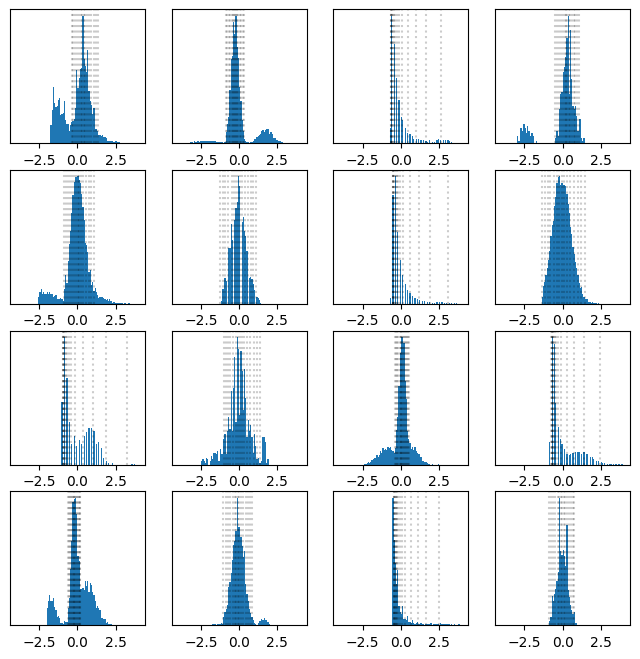

In [6]:
# plot example data points
nr = 4
nc = 4
plt.figure(figsize=(8,8))
idx = np.random.choice(len(x_train), nr*nc)
bins = np.linspace(-4, 4, 101)
for i in range(nr*nc):
    plt.subplot(nr, nc, i+1)
    plt.hist(x_train[idx[i]], bins, density=True)
    for j in range(len(y_train[0])):
        plt.axvline(y_train[idx[i]][j], c='k', linestyle=':', alpha=0.2)
    plt.yticks([])
    

In [7]:
# optionally add size prediction
y_train = np.array(y_train)
y_train = np.hstack([
    y_train, 
    np.array([i[0]/sum(i) for i in sizes_train]).reshape(-1, 1)
])

y_val = np.array(y_val)
y_val = np.hstack([
    y_val, 
    np.array([i[0]/sum(i) for i in sizes_val]).reshape(-1, 1)
])


In [8]:
len(x_train)


9000

In [9]:
y_train.shape


(9000, 16)

In [10]:
rinetv1.fit(
    x_train,
    y_train,
    x_val,
    y_val,
    model_save_path=output_path
)


Epoch 1/20


I0000 00:00:1765762788.611685  308564 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: val_loss improved from None to 0.22933, saving model to ./model/model.weights.h5
1125/1125 - 6s - 6ms/step - loss: 0.2590 - val_loss: 0.2293
Epoch 2/20

Epoch 2: val_loss improved from 0.22933 to 0.18588, saving model to ./model/model.weights.h5
1125/1125 - 2s - 2ms/step - loss: 0.1881 - val_loss: 0.1859
Epoch 3/20

Epoch 3: val_loss improved from 0.18588 to 0.16104, saving model to ./model/model.weights.h5
1125/1125 - 2s - 2ms/step - loss: 0.1665 - val_loss: 0.1610
Epoch 4/20

Epoch 4: val_loss improved from 0.16104 to 0.15044, saving model to ./model/model.weights.h5
1125/1125 - 2s - 2ms/step - loss: 0.1553 - val_loss: 0.1504
Epoch 5/20

Epoch 5: val_loss improved from 0.15044 to 0.14931, saving model to ./model/model.weights.h5
1125/1125 - 2s - 2ms/step - loss: 0.1461 - val_loss: 0.1493
Epoch 6/20

Epoch 6: val_loss improved from 0.14931 to 0.14504, saving model to ./model/model.weights.h5
1125/1125 - 2s - 2ms/step - loss: 0.1403 - val_loss: 0.1450
Epoch 7/20

Epoch 7: val

In [11]:
history = pickle.load(open(output_path + '/model_history.pkl', 'rb'))


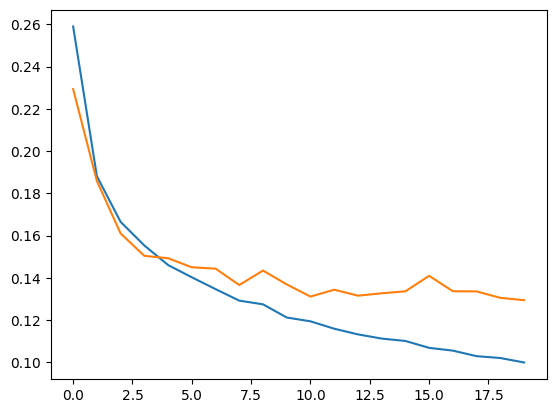

In [12]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
